# Chapitre 3 Deep Learning [IAS](www.ias.sn)
# Classification d'images du jeu de données MNIST avec Keras et TensorFlow utilisant les DNN 

Auteur: [Papa Séga WADE](https://solo.to/mathspsw) 


### La tâche de l'IA

Notre objectif est de construire et d'entraîner un réseau neuronal artificiel sur des milliers d'images de chiffres manuscrits afin qu'il puisse en identifier d'autres avec succès lorsqu'elles lui sont présentées. Les données qui seront incorporées sont la base de données MNIST qui contient 60 000 images pour l'entraînement et 10 000 images de test. Nous utiliserons l'API Python Keras avec TensorFlow comme backend.

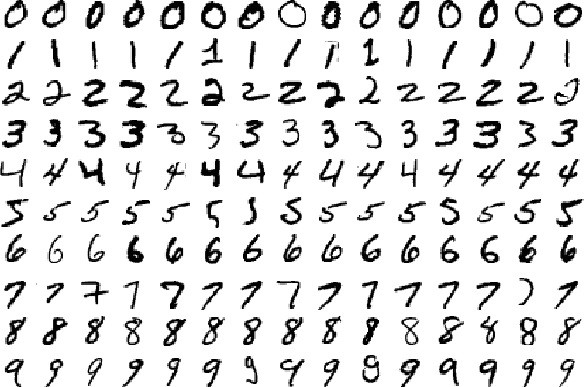

## QUelsques modules de Python.

Tout d'abord, certains logiciels doivent être chargés dans l'environnement Python.

In [ ]:
import numpy as np                   # librairie de maths 
import matplotlib.pyplot as plt      # pour l'affichage 
import random                        # génération de nombre aléatoire

from keras.datasets import mnist     # MNIST dataset dans keras 
from keras.models import Sequential  # Le type de modèle que nous allons utiliser 

from keras.layers.core import Dense, Dropout, Activation # Les types de couches que pour notre modèle 
from keras.utils import np_utils                         # quelques outils de NumPy 

## Chargement des données d'entraînement

L'ensemble de données MNIST est commodément intégré à Keras, et nous pouvons facilement analyser certaines de ses caractéristiques en Python.

# A faire: charger le jeu donénes 

In [ ]:
# Les données MNIST sont répartis entre 60,000 28 x 28 pixel training images et 10,000 28 x 28 pixel testing images 

## TO 
# ------------------------------------------
## DO 

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


En utilisant matplotlib, nous pouvons tracer quelques échantillons d'images de l'ensemble de formation directement dans ce carnet Jupyter.

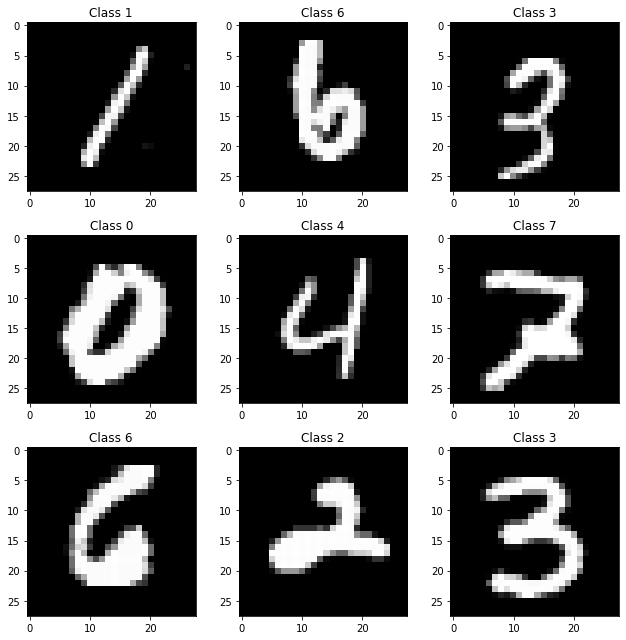

In [ ]:
plt.rcParams['figure.figsize'] = (9,9) # aggradissement de la figure 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Examinons de plus près un seul chiffre, et imprimons le tableau représentant le dernier chiffre.

In [ ]:
# Une matice de taille 28x28 montrant la representation des digits 
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

# now print!        
matprint(X_train[num])

0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0    0    0   29  135  167  208  254  255  255  254  229  105    2    0    0    0   0  0  0  0  0  0  
0  0  0  0  0   0   37  184  236  253  253  253  253  253  253  253  253  253   89    0    0    0   0  0  0  0  0  0  
0  0  0  0  0  35  223  253  253  253  248  248  148  139  139  149  253  253  225   37    0    0   0  0  0  0  0  0  
0  0  0  0  0  31  150  191  102   98    0    0 

## Formatage des données d'entré 

Au lieu d'une matrice 28 x 28, nous construisons notre réseau pour accepter un vecteur de 784 caractères.

Chaque image doit ensuite être remodelée (ou aplatie) en un vecteur. Nous normaliserons également les entrées pour qu'elles soient comprises dans l'intervalle [0-1] plutôt que [0-255]. Il est généralement recommandé de normaliser les entrées afin que toutes les dimensions supplémentaires (pour d'autres architectures de réseau) soient à la même échelle.

Traduit avec www.DeepL.com/Translator (version gratuite)

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [ ]:
X_train = X_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60,000 784-length vectors.
X_test = X_test.reshape(10000, 784)   # reshape 10,000 28 x 28 matrices into 10,000 784-length vectors.

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                        # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


Nous modifions ensuite nos classes (chiffres uniques) pour qu'elles soient au format "one-hot", à savoir

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
etc.
```

Si la sortie finale de notre réseau est très proche d'une de ces classes, alors il s'agit très probablement de cette classe. Par exemple, si la sortie finale est :

```
[0, 0.94, 0, 0, 0, 0, 0.06, 0, 0]
```
alors il est très probable que l'image soit celle du chiffre `1`.

In [ ]:
nb_classes = 10 # nombre de classes 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

# Construire un réseau de neurone de trois chouche complétement connecté. 

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/figure.png?raw=1" />

In [ ]:
# Le type de modèle qu'on aura à utuliser qui un modèle Séquentiele.

model = Sequential()

## La première couche cachée

In [ ]:
# La première couche caché est composé de 512 noeuds (neurones artificiels).
# Chaque noeud recevera un donnée d'entré avec le poids et le biais.

model.add(Dense(512, input_shape=(784,))) 

In [ ]:
# Une fonction activation est une fonction non linéaire appliquée à la sortie d'une couche son rôle est juste de changer la perception sur les données.
# Elle vérifie la nouvelle valeur du noeud et décide si ce neurone artificiel a été activé.
# L'unité linéaire rectifiée ou en anglais The Rectified Linear Unit (ReLU) convertit toutes les entrées négatives des noeuds de la couche suivante en zéro.
# Ces entrées ne sont donc pas considérées comme ayant été activées.
# Les valeurs positives d'un noeud restent inchangées.

model.add(Activation('relu'))

$$f(x) = max (0,x)$$
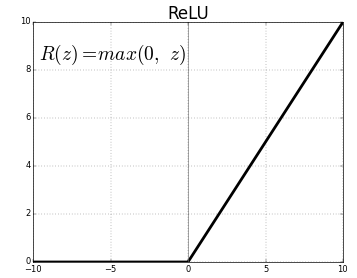

In [ ]:
# Dropout met à zéro une sélection de sorties aléatoires (c'est-à-dire qu'il désactive leur activation).
# L'abandon permet de protéger le modèle contre la mémorisation ou l'adaptation excessive des données d'apprentissag (c'est à dire du overfitting)
model.add(Dropout(0.2)) ## ici on fait un Dropoutr aléatoire de 20% des neurones de sortis 

## Ajout de la deuxième couche cachée
# **A compléter !**

In [ ]:
# La deuxième couche cachée est identique à la première couche.
# Cependant, au lieu que chacun des 512 noeuds reçoive 784 entrées provenant des données d'image d'entrée,
# ils reçoivent 512 entrées de la sortie de la première couche de 512 noeuds.
# Avec un Dopout à la fonction de 20% des neurones 

## TO 
#-----------------   
#-----------------  
#-----------------
## DO

## La couche finale de sortie composée de 10 neurones.

# **A compléter et dire en commentaire pourquoi nous n'avons que 10 neurones à la sortie**

In [ ]:
# La couche finale de 10 neurones est entièrement connectée à la couche précédente de 512 nœuds.
# La couche finale d'un FCN doit être égale au nombre de classes souhaitées (10 dans ce cas).

## TO 
#----------
## DO 
# pourquoi 10 neurones ? --------------------

In [ ]:
# L'activation "softmax" représente une distribution de probabilité sur K résultats différents possibles.
# Ses valeurs sont toutes non-négatives et leur somme est égale à 1.

model.add(Activation('softmax'))

In [ ]:
# Résumé du modèle que vous devez construire ! 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

## Compilation de notre modèle
Keras s'appuie sur Theano et TensorFlow. Ces deux paquets vous permettent de définir un *graphe de calcul* en Python, qui est ensuite compilé et exécuté efficacement sur le CPU ou le GPU sans la surcharge de l'interpréteur Python.

Lors de la compilation d'un modèle, Keras vous demande de spécifier votre **fonction de perte** et votre **optimiseur**. La fonction de perte que nous utiliserons ici est appelée *entropie croisée catégorielle*, et est une fonction de perte bien adaptée à la comparaison de deux distributions de probabilité.

Nos prédictions sont des distributions de probabilité sur les dix chiffres différents (par exemple, "nous sommes sûrs à 80 % que cette image est un 3, à 10 % qu'elle est un 8, à 5 % qu'elle est un 2, etc.), et la cible est une distribution de probabilité avec 100 % pour la catégorie correcte et 0 pour tout le reste. L'entropie croisée est une mesure de la différence entre votre distribution prédite et la distribution cible. [Plus de détails sur Wikipedia] (https://en.wikipedia.org/wiki/Cross_entropy)

L'optimiseur permet de déterminer la vitesse d'apprentissage du modèle par **descente de gradient**. La vitesse de descente d'un gradient est appelée **taux d'apprentissage**.

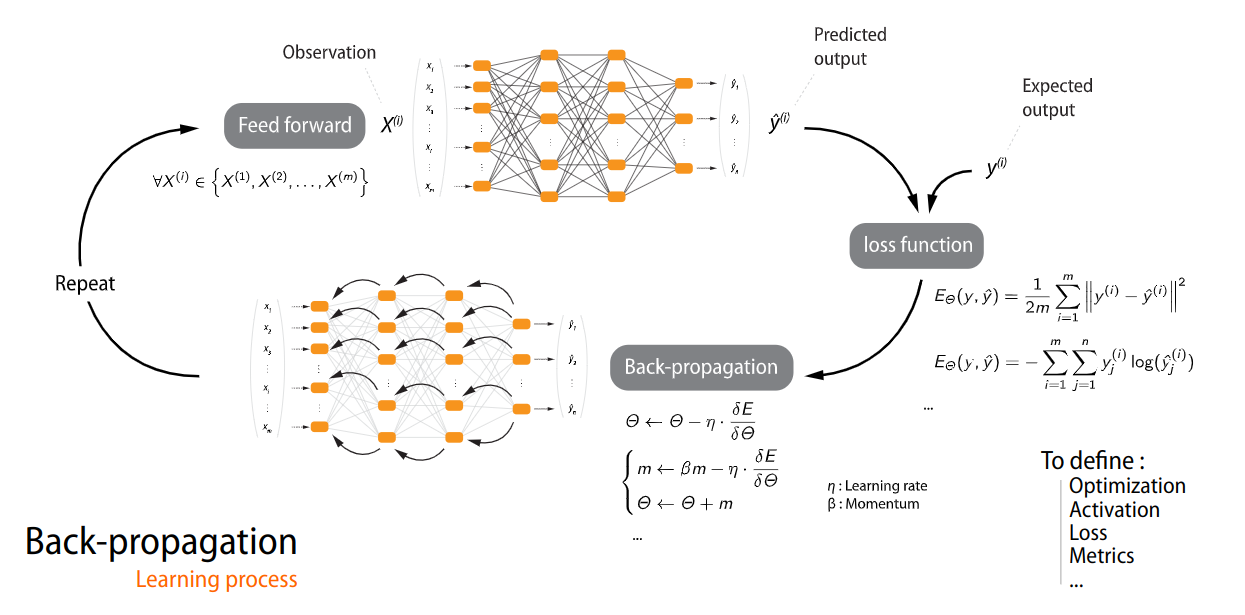

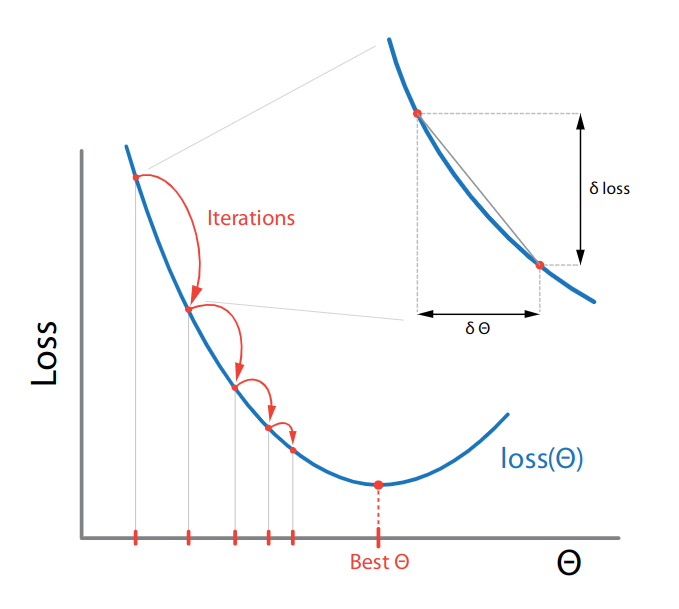

Les petits taux d'apprentissage sont-ils donc meilleurs ? Pas tout à fait ! Il est important pour un optimiseur de ne pas rester coincé dans des minima locaux tout en négligeant le minimum global de la fonction de perte. Cela signifie parfois qu'il faut essayer un taux d'apprentissage plus élevé pour sortir d'un minimum local.

In [ ]:
# utilisons la fonction d'optimisation adam 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Entraînez le modèle !
C'est la partie la plus amusante ! 

La taille du lot (the batch size) détermine la quantité de données utilisée par étape pour calculer la fonction de perte, les gradients et la rétropropagation. Les lots de grande taille permettent au réseau de terminer son apprentissage plus rapidement ; cependant, il faut tenir compte d'autres facteurs que la vitesse d'apprentissage.

Une taille de lot trop importante lisse les minima locaux de la fonction de perte, ce qui amène l'optimiseur à s'installer dans l'un d'eux parce qu'il pense avoir trouvé le minimum global.

Une taille de lot trop petite crée une fonction de perte très bruyante, et l'optimiseur peut ne jamais trouver le minimum global.

Il faut donc parfois procéder par essais et erreurs pour trouver une bonne taille de lot !

In [ ]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5,
          verbose=1)

Epoch 1/5
469/469 [==============================] - 7s 14ms/step - loss: 0.2492 - accuracy: 0.9258
Epoch 2/5
469/469 [==============================] - 7s 15ms/step - loss: 0.0988 - accuracy: 0.9703
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0725 - accuracy: 0.9768
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0549 - accuracy: 0.9827
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0455 - accuracy: 0.9854


Les deux chiffres, dans l'ordre, représentent la valeur de la fonction de perte du réseau sur l'ensemble de formation, et la précision globale du réseau sur les données de formation. Mais comment se comporte-t-il avec les données sur lesquelles il n'a pas été formé ?

## Evaluate Model's Accuracy on Test Data

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0629 - accuracy: 0.9809
Test score: 0.06286197155714035
Test accuracy: 0.98089998960495
